In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("/content/height-weight.csv")


In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


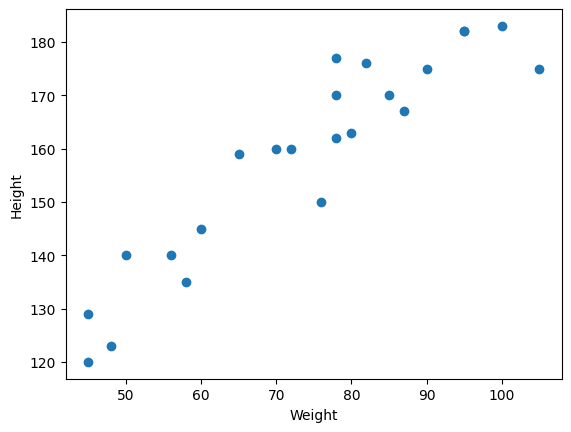

In [4]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [5]:
##finding correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


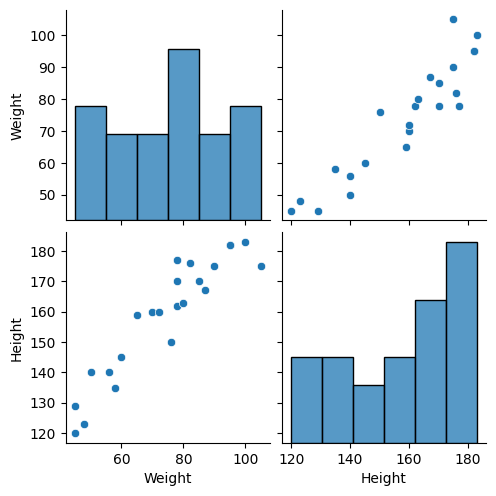

In [6]:
import seaborn as sns

sns.pairplot(df)

In [7]:
## Independent and dependent features
X = df[['Weight']]# independednt feature should be dataframe or 2 dimensional array
y = df['Height'] # dependent features can be one dimensional array or series form

In [8]:
X_series = df['Weight']# independednt feature should be dataframe or 2 dimensional array


In [9]:
#Train Test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25,random_state=42)

In [10]:
##standardization -->apply z score. xi-m/sigma

from sklearn.preprocessing import StandardScaler


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [12]:
#in test data we donot apply fit_transform

X_test = scaler.transform(X_test)


In [14]:
##apply simple linear regression

from sklearn.linear_model import LinearRegression

In [16]:
regression = LinearRegression(n_jobs = -1)

In [18]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [21]:
print("Coefficient is ",regression.coef_)

Coefficient is  [17.2982057]


In [22]:
print("Intercept is",regression.intercept_)

Intercept is 156.47058823529412


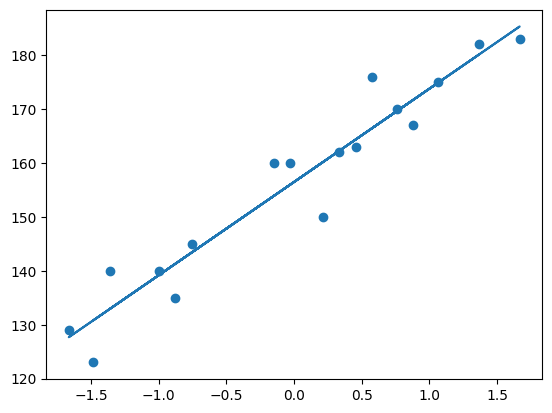

In [26]:
##plot the Training data best fit line

plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [27]:
##prediction for test data --> predicted height op = intercept + coeff(weights)

y_pred = regression.predict(X_test)


In [38]:
#performance matrics

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [39]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)
print("MSE : ",mse)
print("MAE : " ,mae)
print("RMSE :",rmse)
print("R2 score :",score)

MSE :  114.84069295228699
MAE :  9.66512588679501
RMSE : 10.716374991212605
R2 score : 0.7360826717981276


In [40]:
#OLS Linear regression

import statsmodels.api as sm


In [41]:
model = sm.OLS(y_train,X_train).fit()

In [42]:
prediction = model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [44]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 23 Jun 2025   Prob (F-statistic):                       0.664
Time:                        00:55:29   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [46]:
## prediction for new data

regression.predict(scaler.transform([[72]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])